## PCA

In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

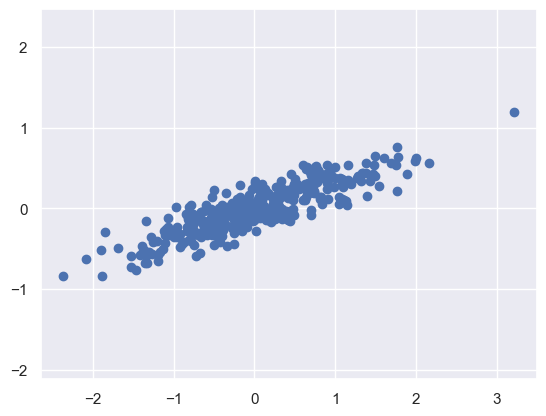

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 350)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # liczba "komponentów" jest taka sama jak wymiar danych, pozwala to znalezc "główne" osi w danych
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_) # określają kierunek wektorów

[[ 0.94739038  0.3200804 ]
 [-0.3200804   0.94739038]]


In [5]:
print(pca.explained_variance_) #określają długość^2 wektorów, czyli jak waże są poszczególne osie

[0.74757538 0.02065518]


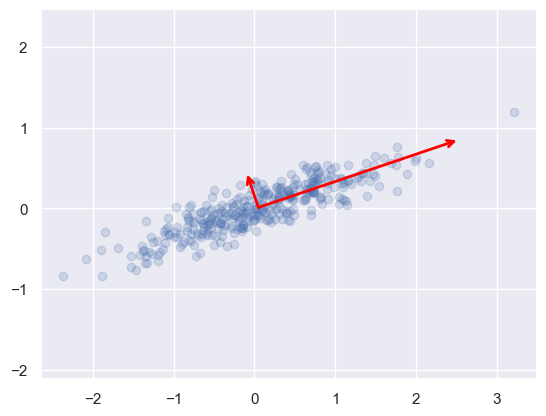

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="red")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## Redukcja wymiarów

### Zadanie 1 (1 p)

spróbuj wykorzystać PCA do redukcji wymiarów powyższych danych. 

 - Ustaw liczbę komponentów na 1 (redukujemy z 2)
 - wykonaj transformację punktów (metoda transform na wytrenowanym modelu) i zapisz je jako nowe
 - sprawdz czy otrzymano odpowiedni rozmiar danych (shape)
 - wyświetl na wykresie nowe punkty oraz dla porównania oryginalne

In [7]:
pca2 = PCA(n_components=1).fit(X)

In [48]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
pca3 = PCA(n_components=1).fit(X2)

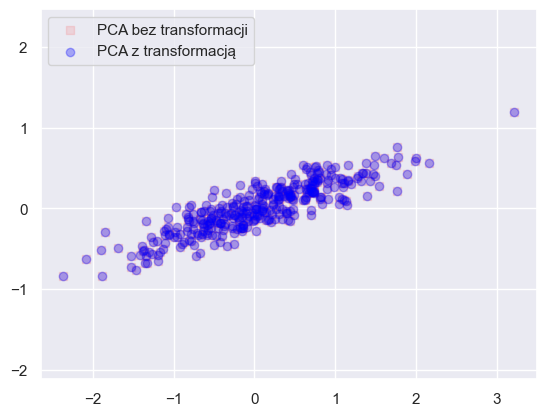

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X[:, 0], X[:, 1], alpha=0.1,c=['red'],marker="s",label="PCA bez transformacji")
ax1.axis('equal');
ax1.scatter(X[:, 0], X[:, 1], alpha=0.3,c=['blue'],marker="o",label='PCA z transformacją')
ax1.legend(loc='upper left')
ax1.axis('equal');

Wizualizacja danych rzeczywistych

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

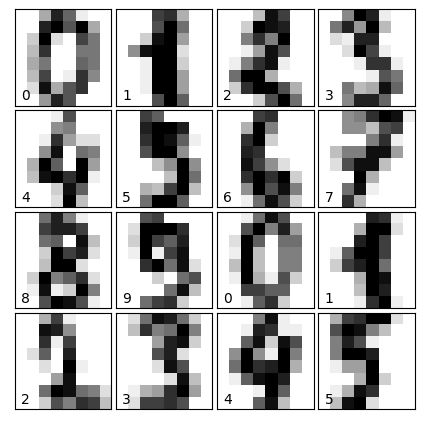

In [14]:
# set up the figure
fig = plt.figure(figsize=(4, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [79]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


array([0, 1, 2, ..., 8, 9, 8])

ValueError: 'c' argument has 1797 elements, which is inconsistent with 'x' and 'y' with size 150.

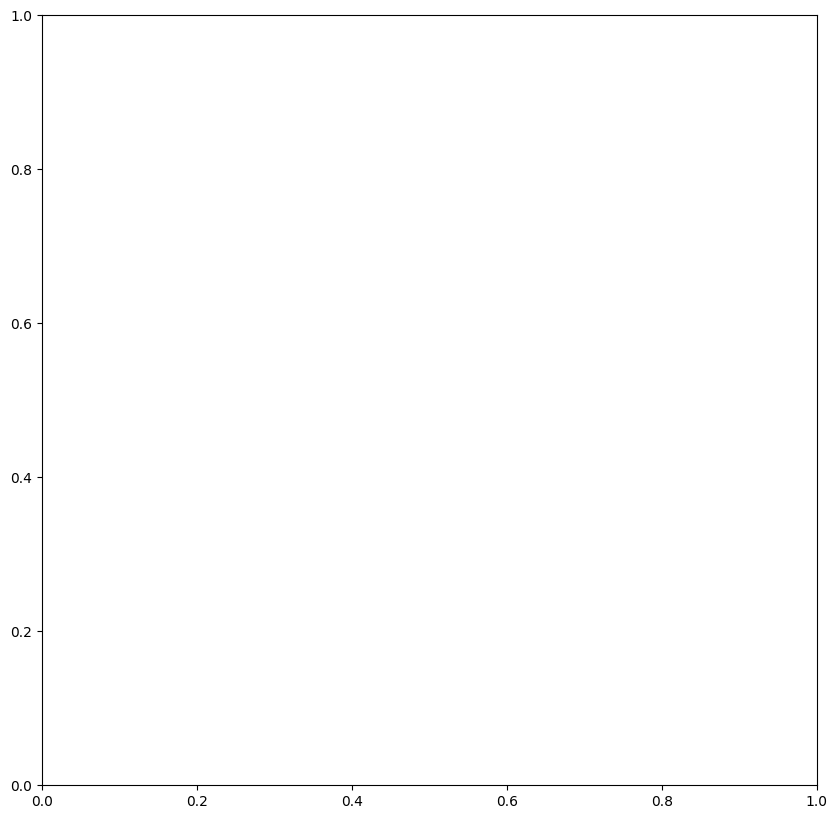

In [77]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();# Obrazki jako wejście, kazdy z tych obrazkow ma 64 wymiary, sprowadzamy do 2 wymiarow, 

## K srednich

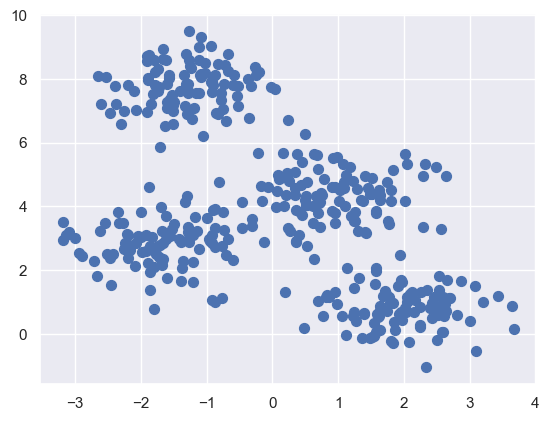

In [13]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/maciejbunkowski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y_kmeans

array([3, 0, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0,
       1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 0, 3, 0, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 0,
       2, 3, 0, 1, 0, 3, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 3,
       0, 2, 0, 2, 3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 3, 3, 0, 1, 3, 1, 2, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       1, 0, 3, 0, 1, 3, 1, 0, 3, 0, 0, 1, 0, 2, 3, 0, 2, 0, 2, 3, 2, 3,
       1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       3, 0, 3, 1, 3, 1, 0, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 0, 1, 1, 1, 2,
       2, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 1, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1,
       0, 3, 1, 0, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 1, 2, 0, 2, 3, 0, 2, 3,
       3, 1, 2, 3, 1, 3, 2, 0, 0, 2, 0, 3, 1, 1, 3, 3, 2, 1, 3, 0, 0, 0,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 2, 2, 3, 0, 1,

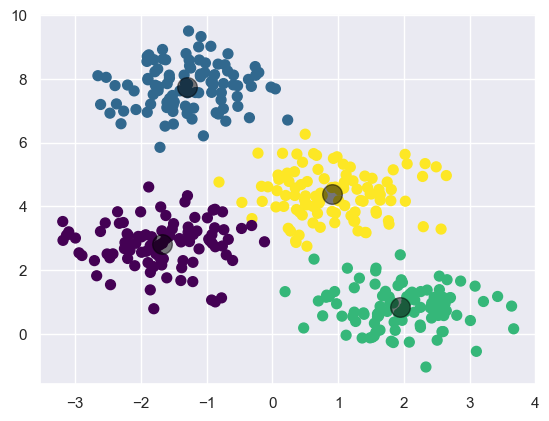

In [16]:
# rysuj z kolorem klasy
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# dodaj centroidy
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [73]:
# ocena klastrowania - współczynnik silhouette im bliżej 1 tym lepsze dopasowanie
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.4433587234768862

Jak wybrać najlepszą liczbę klastrów?
- współcznnik silhuette  dla roznej liczby klastrow
- metoda łokciowa - na podstawie sumy kwadratów odległości  punktów wewnątrz klastrów do centroidów

In [17]:
wcss = [] 
K = range(1, 10)

for i in K: 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center

/Users/maciejbunkowski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maciejbunkowski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maciejbunkowski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maciejbunkowski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

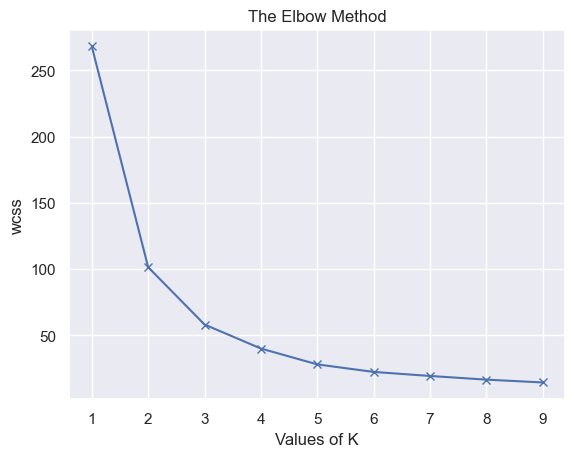

In [75]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

### Zadanie 2 (2p)

Spróbuj pogrupować  dane ze zbioru iris. 

Wybierz odpowiednią liczbę klastrów wykorzystując sumę kwadratów odległości punktów od najbliższych centroidów oraz dodatkowo współczynnik silhouette.

 Jakie są wartości powyższych miat tych  dla wybranej liczby klastrów. Do oceny  wykorzystaj również etykiety iris. 

 Zredukuj dane do 2 wymiarów i zwizualizuj klastry.

In [92]:
from sklearn import datasets
X = datasets.load_iris()['data']

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 2 The average inertia is : 152.34795176035792
For n_clusters = 3 The average silhouette_score is : 0.5511916046195919
For n_clusters = 3 The average inertia is : 78.8556658259773
For n_clusters = 4 The average silhouette_score is : 0.4965168654914938
For n_clusters = 4 The average inertia is : 57.265619047619055
For n_clusters = 5 The average silhouette_score is : 0.4887488870931055
For n_clusters = 5 The average inertia is : 46.44618205128205
For n_clusters = 6 The average silhouette_score is : 0.3648340039670025
For n_clusters = 6 The average inertia is : 39.03998724608725


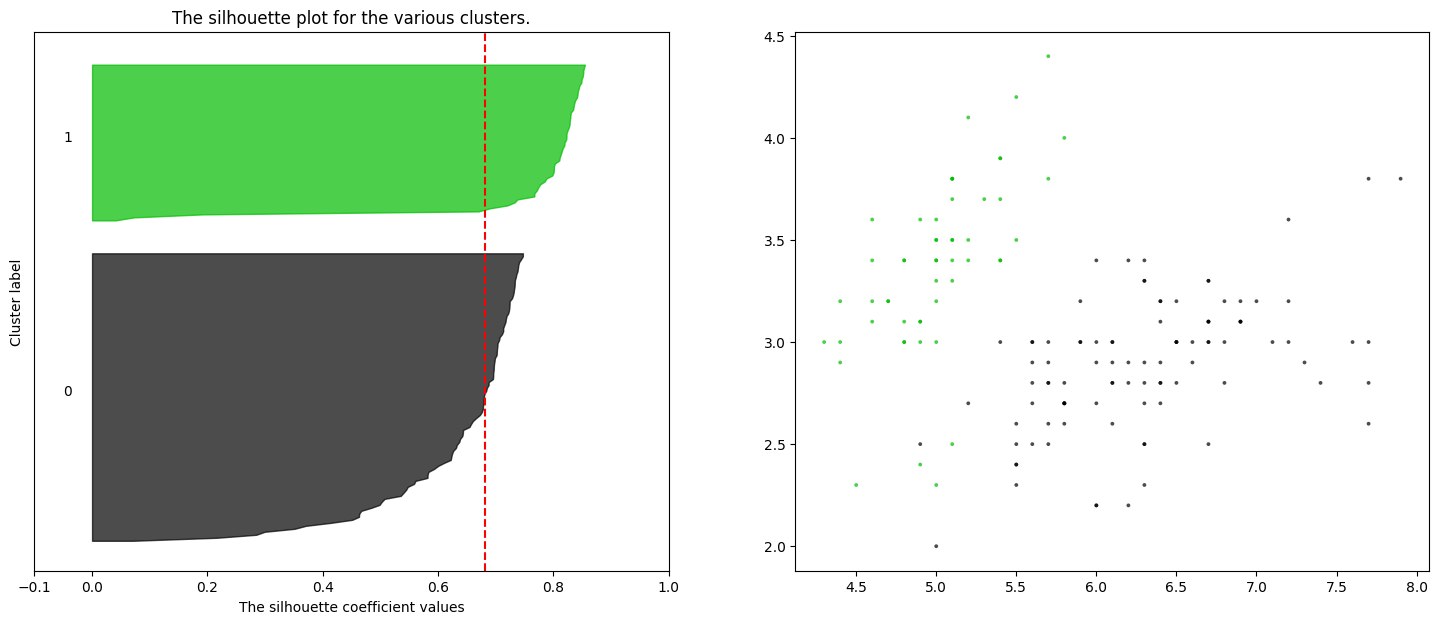

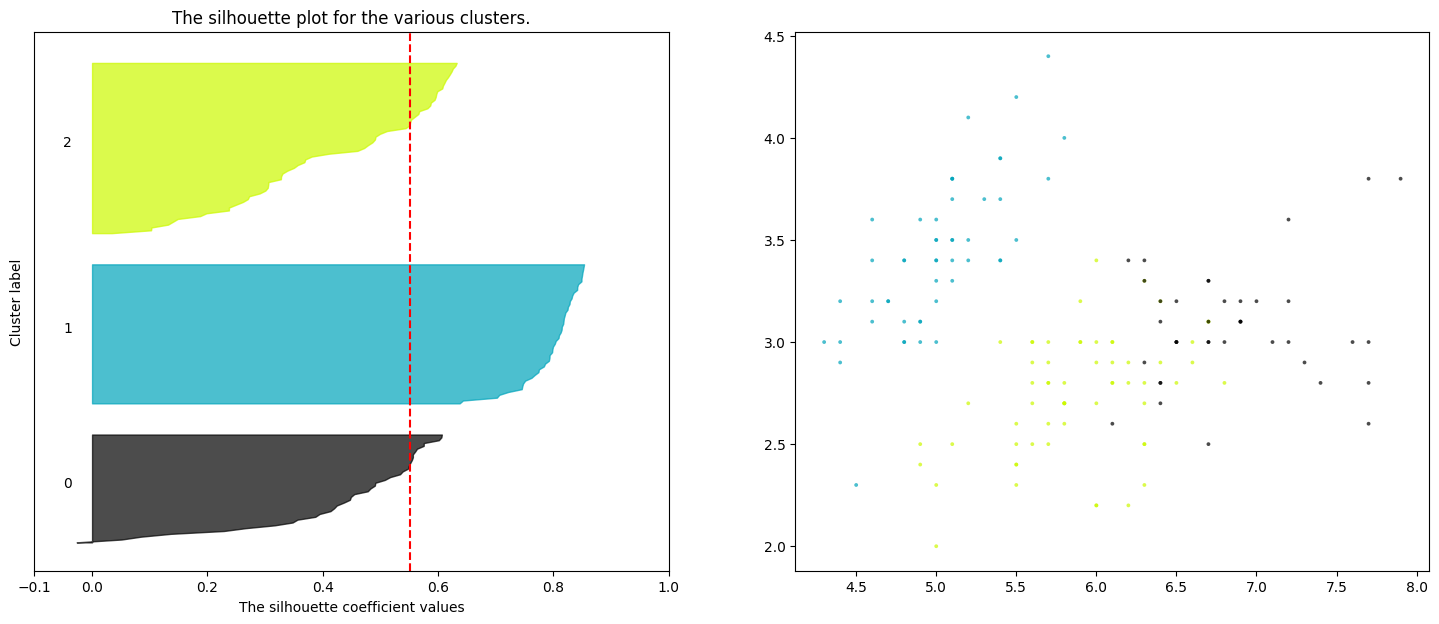

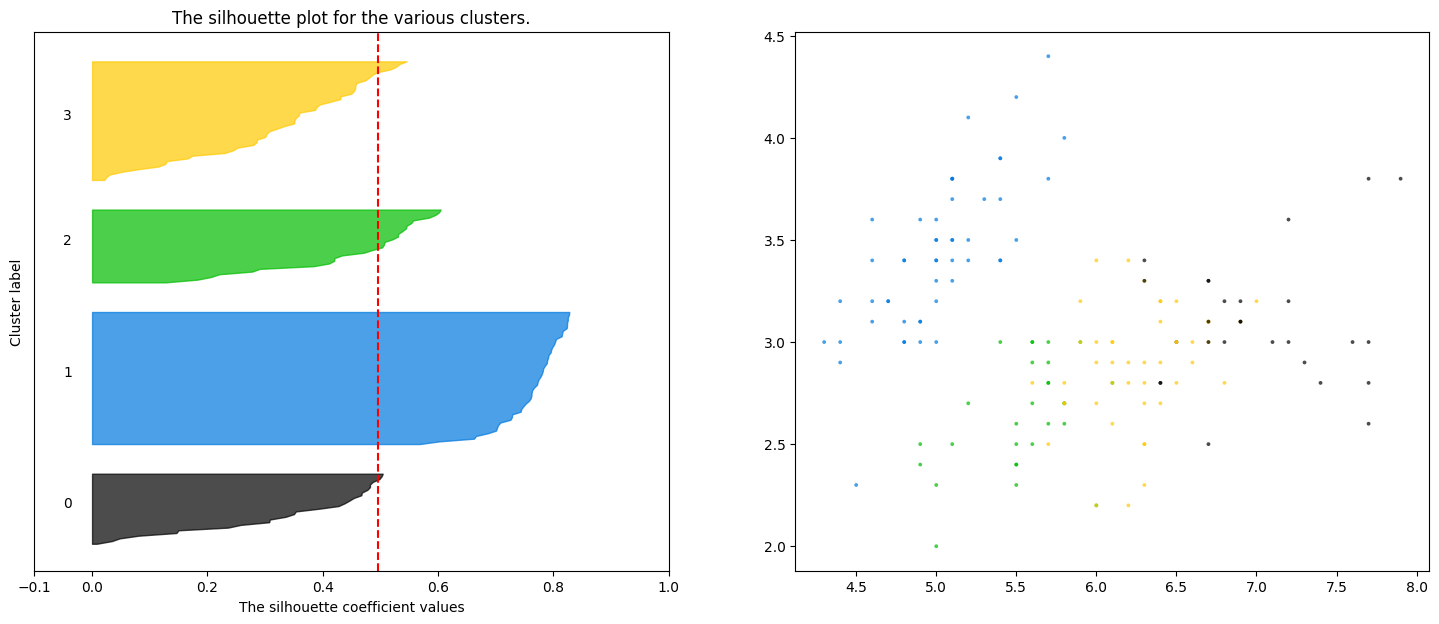

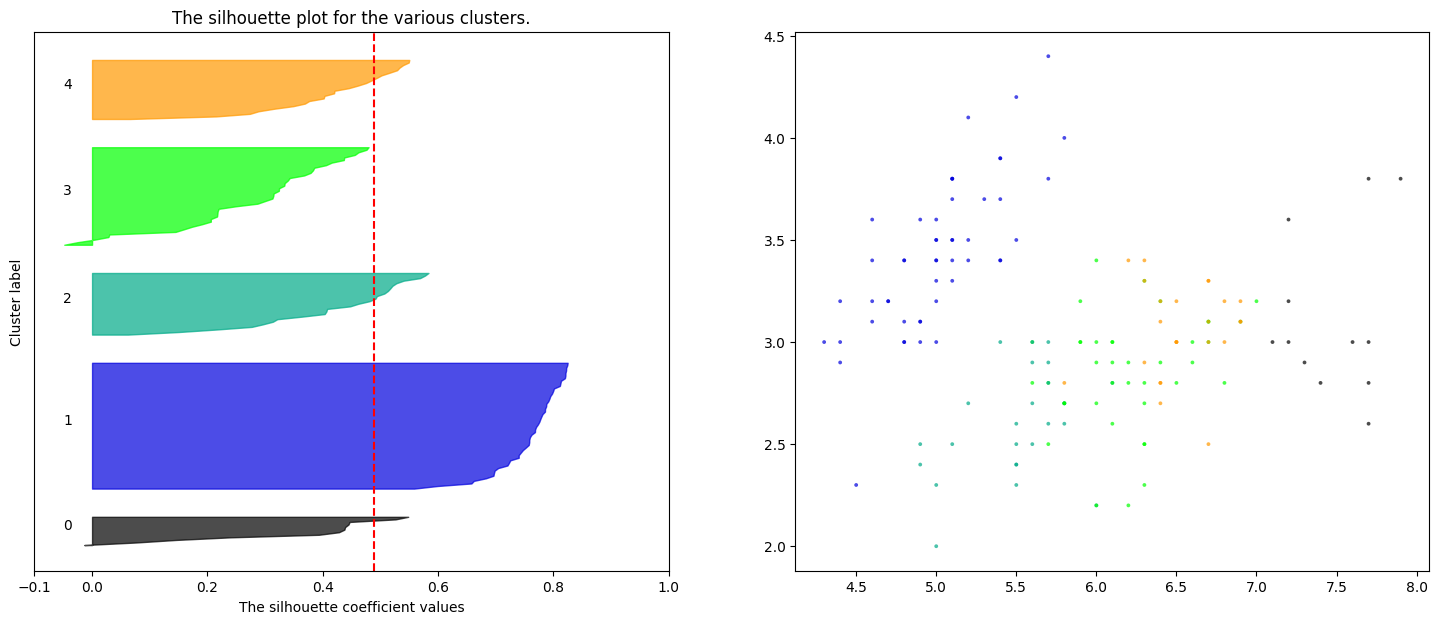

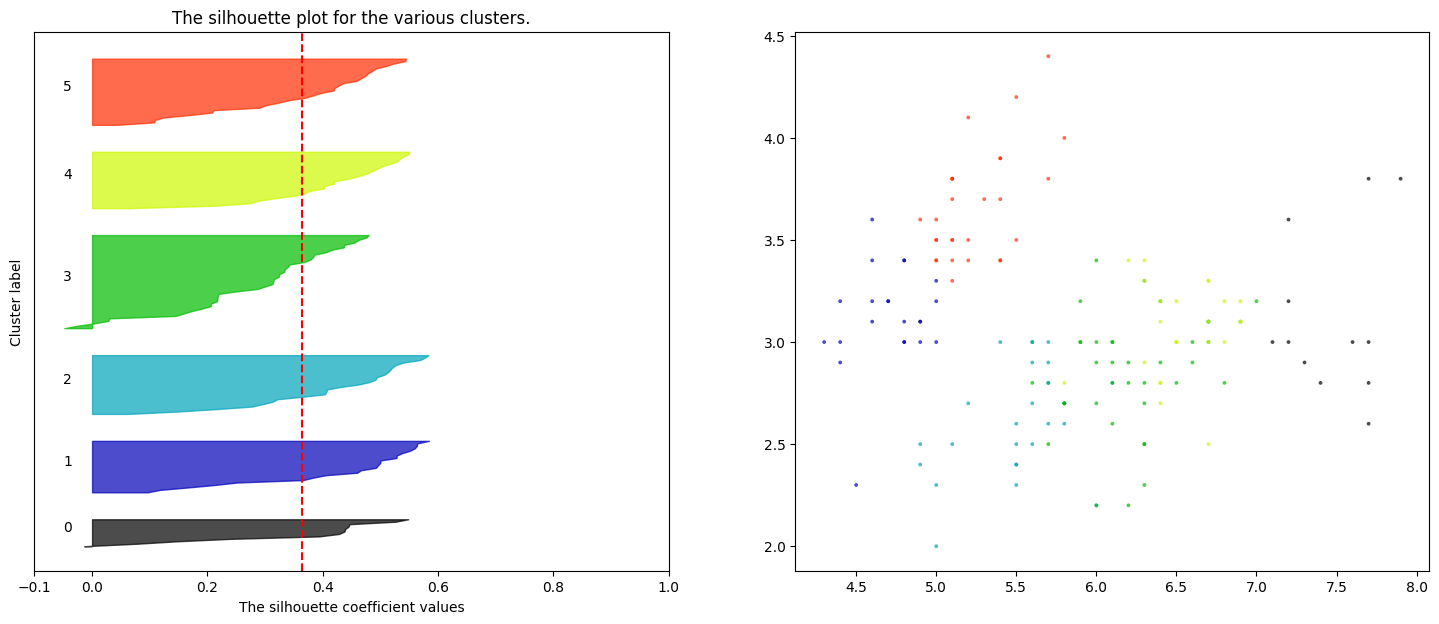

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6]
elbow = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    elbow.append(clusterer.inertia_)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    print("For n_clusters =",
        n_clusters,
        "The average inertia is :",
        clusterer.inertia_)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

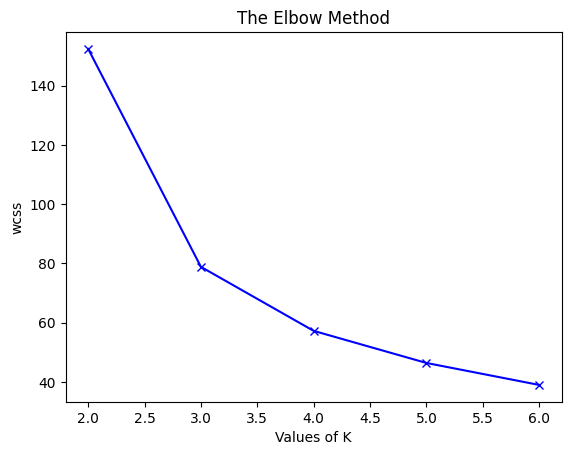

In [94]:
plt.plot(range_n_clusters, elbow, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

Z powyzszych wykresów i miar wynika, ze optymalna liczba k=3.

In [95]:
target = datasets.load_iris()['target']
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(X)
print(X.data.shape)
print(projected.shape)

(150, 4)
(150, 2)


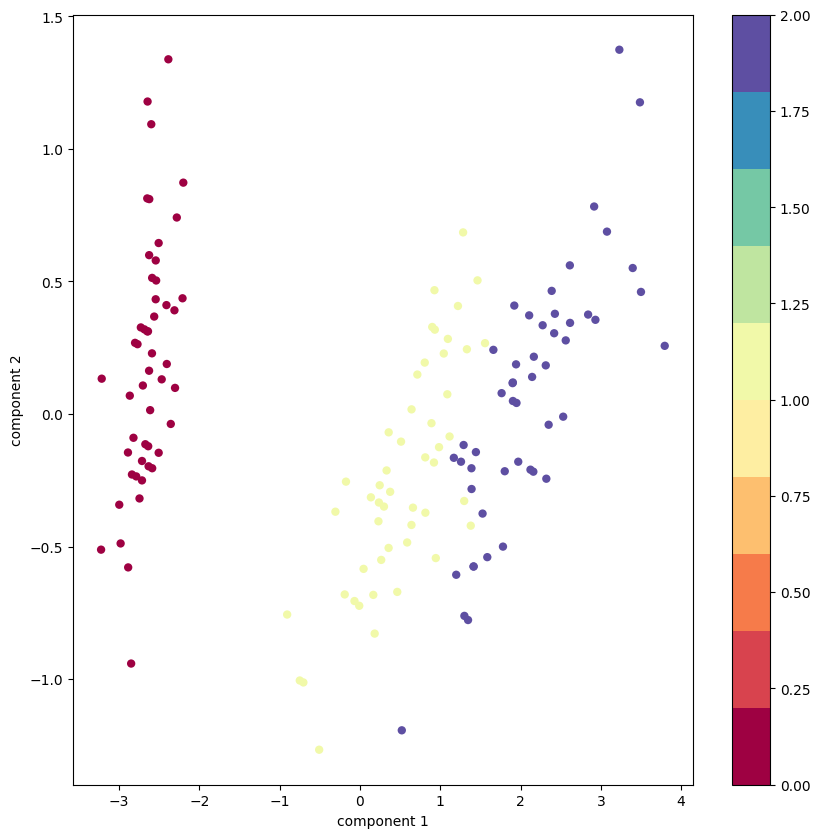

In [98]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches

plt.scatter(projected[:, 0], projected[:, 1],
            c=target, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();# Obrazki jako wejście, kazdy z tych obrazkow ma 64 wymiary, sprowadzamy do 2 wymiarow, 